# Reconocimiento de Vocales por medio de Inteligencia Artificial
**Por:** Santiago Rocha y Sebastián Rojas

### Abstract
**Existe en las personas la voluntad de, escribiendo a mano y con suspropias caligrafías, poder trasladar del papel a la máquina aquello que se escriba, con propósitos generales tales como guardar y/o visualizar información.
Para esto, se indagará en el campo de la identificación de caracteres por medio de ciertos patrones que se pueden observar la información que sea adquirida.
Con el propósito de cumplir este objetivo, se aplicarán los diferentes estándares que componen la inteligencia artificial queriendo diseñar un programa, que acompañado de una investigación en el campo determinado, logre realizar buenos acercamientos a la correcta traducción de la escritura hecha a mano, a lenguaje entendible por un computador.**

**El proyecto está planteado de forma que la extensibilidad permita ampliar el campo de aplicación del programa que se quiere diseñar e implementar. Buscamos tener la capacidad de identificar vocales limitadas por una representación minimal de pixeles, para asentar las bases de futuras mejoras que se quieran diseñar.**

### Introducción

## Idea 1
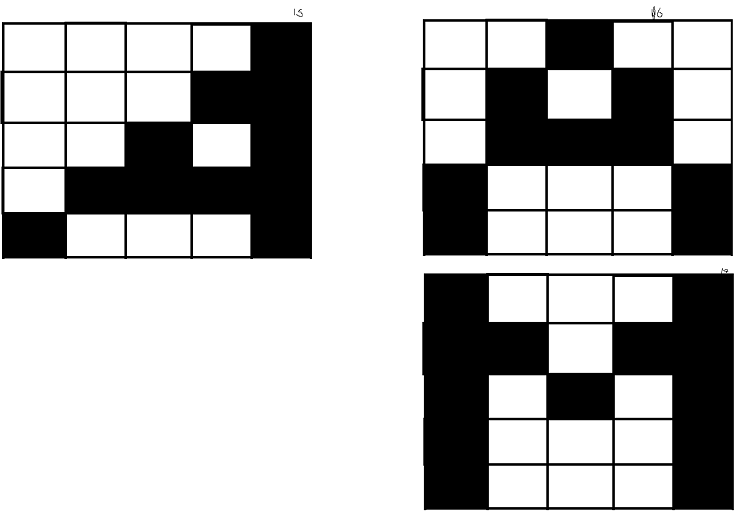

## Idea 2
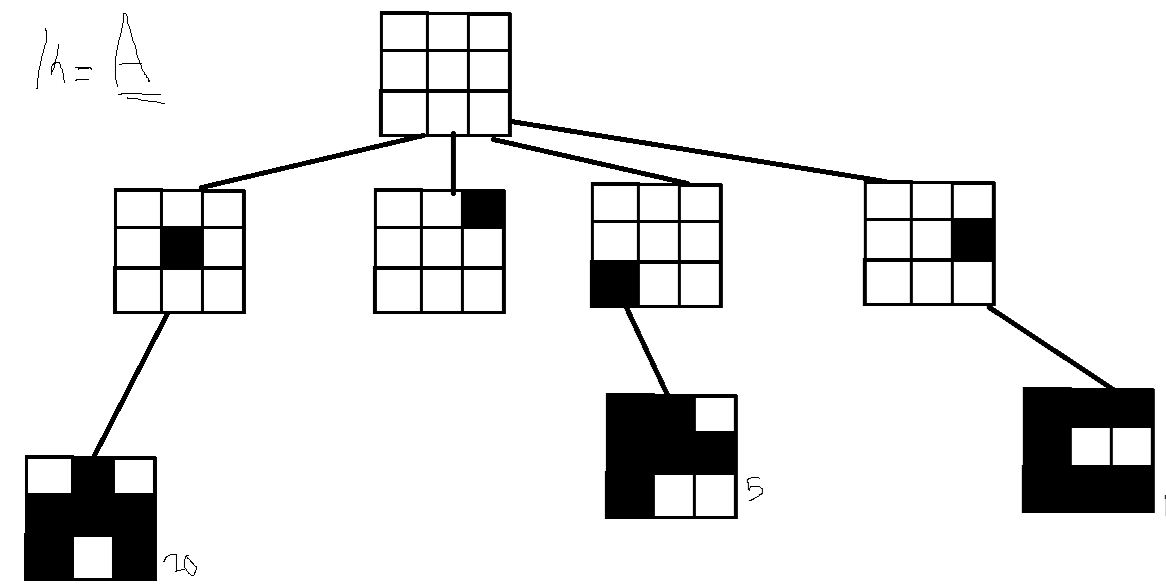

Nos centraremos principalmente en explorar varias ideas de un mismo problema para de esta manera llegar a la solución más eficiente, daremos un recorrido a travez de los diferentes algoritmos aplicables entendiendo de esta manera cuales son extenciones más eficientes que otras entre las cuales las brechas de rendimiento son muy grandes.

Para aterrizar un poco más el tema el problema que queremos solucionar trata sobre el reconocimiento de patrones para de está manera asociarlos con caracteres, en especifico nos centraremos en una pequeña muestra de la gran cantidad de caracteres que podemos encontrar y para que se imaginen la complejidad en espacio de este problema aun una rejilla de libertad de 5x5 podría dar a lugar a una complejidad muy alta enfrentendanos a tiempos muy prolongados para desarrollar este problema, tiempo que las maquinas de ahora no gastan para realizar este mismo problema, de esta manera, trajaremos unicamente en una rejilla de 3x3 y para expresar con libertad el dominio de caracteres que estamos manejando daremos los siguiente valores a sus respectivas rejillas como lo indica la imagen a continuación

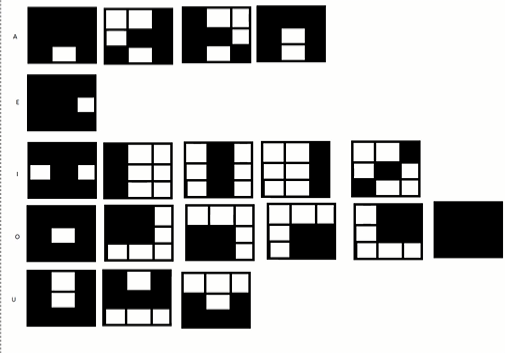

Esto nos lleva a dos posibles ideas al problema planteado que dada una rejilla encontremos su caracter correspondiente, la primera trata en que dado un estado inicial sin ninguna coloración sobre el se comenzarán a generar paso por paso los siguientes estado, con paso por paso me refiere a basicamente comenzar a rellenar uno por uno las rejillas no pintadas dandonos así una ramificación inicial de 9, este problema se tiene pensado modelar y solucionar gracias a un diseño informado, en el cual se definirá una función heuristica que nos facilite el recorrido en el arbol, esto con el proposito de alejarnos de la forma clasica de resolver un problema de este tipo y por medio de algoritmos con inteligencia mejorar la eficacia con la que nos enfrentamos realizando este problema con fuerza bruta. 

En las imagenes que podemos apreciar al inicio de esta breve introducción podemos encontrar dentro de la idea 2 un pequeño esquema para que se pueda entender un poco más del desarrollo de esta  situación.

* Input vacio: No hay letras
* Input tiene solo un pixel coloreado: Input invalido / no hay similitudes
* Si no encuentra similitudes: El input no es una vocal

---
---
---
# Desarrollo - Idea 2

Para comenzar se realizará el modelamiento de las funciones basicas para poder aplicar los algoritmos de busqueda especificos para esta rama, se iniciara sin más ni menos con un input dado ya sea por el usuario o quién desee probar esta solución

In [2]:
user_input = {1: 'x', 2: 'x', 3: 'x',
              4: ' ', 5: 'x', 6: ' ',
              7: 'x', 8: 'x', 9: 'x'}

Como podemos apreciar al correlacionar los diferentes spots marcados en este objeto podemos relacionarlo con la vocal I

In [3]:
import math

class TEstado():
    
    def __init__(self, vocalTableros, vocal=None):
        self.boards = vocalTableros #ArrayDeBoards, de Arrays
        self.vocal = vocal
        self.hs = self.setHs()
        self.final = self.esFinal()
        self.suc = []
        self.crearSucesores()
        
    def __eq__(self, other):
        final = False
        for boardO in other.boards:
            for boardM in self.boards:
                value = True
                for i in boardO:
                    if boardO[i] != boardM[i]:
                        value = False
                if (value == True and final == False):
                     final = True
        return final
    
    def __str__(self):
        impr = "Caracter: " + str(self.vocal) + "\n"
        impr = impr + "Representaciones : \n"
        for board in self.boards:
            impr = impr + board[1] + board[2] + board[3] + "\n"
            impr = impr + board[4] + board[5] + board[6] + "\n"
            impr = impr + board[7] + board[8] + board[9] + "\n--- \n"
        return impr

    def __lt__(self, other):
         return self.costoEstimado() < other.costoEstimado()

    def esFinal(self):
        value = False
        if  self.vocal is not None or self.costoEstimado() == 0 or self.costoEstimado() == 0:
            value = True
        return value

    def equalBoards(board1,board2):
        value = True
        for i in board1:
            if board1[i] != board2[i]:
                value = False
        return value

    def crearSucesores(self):
        if(len(self.boards) == 1 and self.vocal is None):
            board = self.boards[0]
            for i in board:
                if board[i] == ' ':
                    newBoard  = {1: ' ', 2: ' ', 3: ' ',
                                 4: ' ', 5: ' ', 6: ' ',
                                 7: ' ', 8: ' ', 9: ' '}
                    for j in board:
                        newBoard[j] = board[j]
                    newBoard[i] = 'x'
                    if TEstado([newBoard]) == A:
                        self.suc.append(A)
                    elif TEstado([newBoard]) == E:
                        self.suc.append(E)
                    elif TEstado([newBoard]) == I:
                        self.suc.append(I)
                    elif TEstado([newBoard]) == O:
                        self.suc.append(O)
                    elif TEstado([newBoard]) == U:
                        self.suc.append(U)
                    else:
                        self.suc.append(TEstado([newBoard]))
                    
    def sucesores(self):
        return self.suc

    def setHs(self):
        hs = 9
        for board in self.boards:
            hsTemp = 9
            for i in board:
                if board[i] == user_input[i]:
                    hsTemp = hsTemp -1
                if hsTemp < 0:
                    return 0
            if hsTemp < hs:
                hs = hsTemp
        return hs

    def costoEstimado(self):
        return self.hs

    def esPadre(self, other):
        value = False
        for e in self.sucesores():
            if e.igual(other):
                value = True
        return value

Procediendo así a la implentación según la aestructura recomendad del modelo basico de un estado. Ahora procederemos a modelar todos los estados iniciales, punto importante para poder diferenciarlos como estados finales de entre toda la varidad prensente

#### Definición de la Heuristica

Durante esta primera idea se realizará un diseño de heuristica el cual consiste en encontrar las similitudes que puede llegar a tener el input de entrada con los inputs con los que se está comparando, este proceso se hace casilla por casilla comenzando desde un valor máximo de 9 que irá reduciendo a medida que se detecten más similitudes en comparación del input

In [4]:
#####################Definicion de Estados Finales####################

vocalA1 = {1: 'x', 2: 'x', 3: 'x',
           4: 'x', 5: 'x', 6: 'x',
           7: 'x', 8: ' ', 9: 'x'}
vocalA2 = {1: ' ', 2: ' ', 3: 'x',
           4: ' ', 5: 'x', 6: 'x',
           7: 'x', 8: ' ', 9: 'x'}
vocalA3 = {1: 'x', 2: ' ', 3: ' ',
           4: 'x', 5: 'x', 6: ' ',
           7: 'x', 8: ' ', 9: 'x'}
vocalA4 = {1: 'x', 2: 'x', 3: 'x',
           4: 'x', 5: ' ', 6: 'x',
           7: 'x', 8: ' ', 9: 'x'}
vocalA5 = {1: ' ', 2: 'x', 3: ' ',
           4: 'x', 5: ' ', 6: 'x',
           7: 'x', 8: ' ', 9: 'x'}
vocalA6 = {1: ' ', 2: 'x', 3: ' ',
           4: 'x', 5: 'x', 6: 'x',
           7: 'x', 8: ' ', 9: 'x'}

A = TEstado([vocalA1,vocalA2,vocalA3,vocalA4,vocalA5,vocalA6], "A")

vocalE1 = {1: 'x', 2: 'x', 3: 'x',
           4: 'x', 5: 'x', 6: ' ',
           7: 'x', 8: 'x', 9: 'x'}

E = TEstado([vocalE1], "E")

vocalI1 = {1: 'x', 2: 'x', 3: 'x',
           4: ' ', 5: 'x', 6: ' ',
           7: 'x', 8: 'x', 9: 'x'}
vocalI2 = {1: ' ', 2: 'x', 3: ' ',
           4: ' ', 5: 'x', 6: ' ',
           7: ' ', 8: 'x', 9: ' '}
vocalI3 = {1: ' ', 2: ' ', 3: 'x',
           4: ' ', 5: 'x', 6: ' ',
           7: 'x', 8: ' ', 9: ' '}

I = TEstado([vocalI1, vocalI2, vocalI3], "I")

vocalO1 = {1: 'x', 2: 'x', 3: 'x',
           4: 'x', 5: ' ', 6: 'x',
           7: 'x', 8: 'x', 9: 'x'}
vocalO2 = {1: 'x', 2: 'x', 3: ' ',
           4: 'x', 5: 'x', 6: ' ',
           7: ' ', 8: ' ', 9: ' '}
vocalO3 = {1: 'x', 2: 'x', 3: 'x',
           4: 'x', 5: 'x', 6: 'x',
           7: 'x', 8: 'x', 9: 'x'}
vocalO4 = {1: ' ', 2: 'x', 3: ' ',
           4: 'x', 5: ' ', 6: 'x',
           7: ' ', 8: 'x', 9: ' '}
vocalO5 = {1: ' ', 2: 'x', 3: ' ',
           4: 'x', 5: 'x', 6: 'x',
           7: ' ', 8: 'x', 9: ' '}

O = TEstado([vocalO1, vocalO2, vocalO3, vocalO4, vocalO5], "O")

vocalU1 = {1: 'x', 2: ' ', 3: 'x',
           4: 'x', 5: ' ', 6: 'x',
           7: 'x', 8: 'x', 9: 'x'}
vocalU2 = {1: ' ', 2: ' ', 3: ' ',
           4: 'x', 5: ' ', 6: 'x',
           7: 'x', 8: 'x', 9: 'x'}
vocalU3 = {1: 'x', 2: ' ', 3: 'x',
           4: 'x', 5: ' ', 6: 'x',
           7: ' ', 8: 'x', 9: ' '}
vocalU4 = {1: ' ', 2: ' ', 3: ' ',
           4: 'x', 5: ' ', 6: 'x',
           7: ' ', 8: 'x', 9: ' '}

U = TEstado([vocalU1, vocalU2, vocalU3, vocalU4], "U")

Se intento inicialmente reslver este problema por medio de Greddy Fast Search, algo que fue practicamente imposible gracias a la amplia gama de posibilidades que este toma en cuenta. No obstante se añadirá la implentación propuesta

In [5]:
############################Busqueda-Gredy##################################
         #######No recomendable por la commplejidad#######
class BestFirstSearch:

    def add_to_open(self, struc, node):
        value = False
        for i in struc:
            if(i == node):
                value = True
        return value
    
    def busqueda(self, start):
        open = []
        closed = []
        open.append(start)
        closed.append(start)
        while len(open) > 0:
            open.sort()
            current_node = open.pop()
            if current_node.esFinal():
                return print(current_node)
            neighbors = current_node.sucesores()
            for key in neighbors:
                neighbor = TEstado(key.boards,key.vocal)
                if(neighbor not in closed):
                    closed.append(neighbor)
                    open.append(neighbor)
        return None

Se realizarán algunas pruebas de este algoritmo pero como vamos a ver la mayoria de estás tendrán un resultado no muy favorable, asunto que se podría evitar si el campo de muestras fuera mucho más reducido en comparación a este, se da un valor inicial para que así se pueda compilar 

In [6]:
def main(start):
    prove = TEstado([start])
    b = BestFirstSearch()
    print(b.busqueda(prove))

start = {1: 'x', 2: 'x', 3: 'x',
         4: ' ', 5: ' ', 6: ' ',
         7: 'x', 8: 'x', 9: 'x'}

main(start)

Caracter: O
Representaciones : 
xxx
x x
xxx
--- 
xx 
xx 
   
--- 
xxx
xxx
xxx
--- 
 x 
x x
 x 
--- 
 x 
xxx
 x 
--- 

None


In [7]:
start = {1: 'x', 2: 'x', 3: 'x',
         4: ' ', 5: 'x', 6: ' ',
         7: 'x', 8: 'x', 9: 'x'}

main(start)

Caracter: None
Representaciones : 
xxx
 x 
xxx
--- 

None


In [8]:
start = {1: 'x', 2: 'x', 3: 'x',
         4: ' ', 5: 'x', 6: 'x',
         7: 'x', 8: 'x', 9: 'x'}

main(start)

Caracter: O
Representaciones : 
xxx
x x
xxx
--- 
xx 
xx 
   
--- 
xxx
xxx
xxx
--- 
 x 
x x
 x 
--- 
 x 
xxx
 x 
--- 

None


Y aunque sigamos prosiguiendo es muy poco probable entcontrar un valor que se acerque lo más al diseño original.

Debido a esto se indago por algoritmos que tuvieran  un mayor rendimiento pero en escencia la misma idea econtrando algunos tales, como Beam, Hill Climbing, etc...

Para el desarrollo de está parte optima en comparación y más efectiva uno de los que nos resulta util por el tipo de respuesta  que estamos buscando es Beam

In [9]:
############################Busqueda-Beam##################################
                #######Forma Optima de Gredy#########
class Beam:
    
    def busqueda(self, start):
        node = start
        found = False
        open = []
        w_Open = []
        if node.esFinal():
            found = True
            return n
        else:
            open = node.sucesores()
        while found == False or len(node.sucesores())== 0:
            open.sort()
            for i in open:
                if (i < open[0] or i == open[0]) and i not in w_Open:
                    w_Open.append(i)
            open = []
            for n in w_Open:
                if n.esFinal():
                    found = True
                    return n
                else:
                    open = open + n.sucesores()
        return None

Esta version de Best First en mucho más sencilla partiendo que no analiza cada una de  las ramas desplegadas sino que en vez de esto se encarga de expander aquellas con un valor más favorable 

In [10]:
############################Busqueda-Beam##################################
                #######Forma Optima de Gredy#########
class Beam:
    
    def busqueda(self, start):
        node = start
        found = False
        open = []
        w_Open = []
        if node.esFinal():
            found = True
            return n
        else:
            open = node.sucesores()
        while found == False or len(node.sucesores())== 0:
            open.sort()
            for i in open:
                if (i < open[0] or i == open[0]) and i not in w_Open:
                    w_Open.append(i)
            open = []
            for n in w_Open:
                if n.esFinal():
                    found = True
                    return n
                else:
                    open = open + n.sucesores()
        return None

Su error en resultados es mucho más baja que las otras, como  vamos a evidenciar. Pudiendonos dar cuenta que al primer intento y con un estado inicial muy similar al anterior 

In [ ]:
def main():
    start = {1: ' ', 2: ' ', 3: ' ',
             4: ' ', 5: ' ', 6: ' ',
             7: ' ', 8: ' ', 9: ' '}
    prove = TEstado([start])
    b = Beam()
    print(b.busqueda(prove))

main()

### Conclusiones


La optimidad es muy importante al momento de modelar algoritmos dirigidos a la IA. Ya que en la vida real nos enfrentaremos a problemas con un espacio de muestra tan amplio que el problema actual parecera pequeño. Por lo que es fundamental centrarnos e algoritmos que nos ofrecen está posibilidad, claro está, que sin dejar los principales atrás